<a href="https://colab.research.google.com/github/MorganChidley/Final-Year-Project/blob/main/help1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

Importing Dataset & checking misiing values/removing duplicates

In [37]:
import pandas as pd

# Load the dataset
file_path = "MyDataSET.csv"
data = pd.read_csv(file_path)

# Check for missing values
data.isnull().sum()

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Check the new shape of the dataset
data.shape

(903, 2)

In [38]:
import pandas as pd
import re
from urllib.parse import urlparse
from collections import Counter
import math

# === FEATURE EXTRACTION FUNCTIONS ===

def url_length(url):
    """Returns the total length of the URL."""
    return len(url)

def domain_length(url):
    """Returns the length of the domain portion."""
    domain = urlparse(url).netloc
    return len(domain)

def count_subdomains(url):
    """Counts the number of subdomains in the domain."""
    parsed_url = urlparse(url).netloc
    parsed_url = parsed_url.split(':')[0]
    return parsed_url.count('.') - 1

def path_length(url):
    """Returns the length of the URL path."""
    return len(urlparse(url).path)

def path_slash_count(url):
    """Counts the number of slashes in the path."""
    path = urlparse(url).path
    return path.count('/')

def has_https(url):
    """Checks if the URL uses HTTPS."""
    return 1 if urlparse(url).scheme == "https" else 0

def has_ip_address(url):
    """Checks if the URL contains an IP address."""
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    return 1 if re.search(ip_pattern, url) else 0

def domain_is_ip(url):
    """Checks if the domain is an IP address."""
    domain = urlparse(url).netloc
    return 1 if re.fullmatch(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', domain) else 0

def count_query_parameters(url):
    """Counts the number of query parameters."""
    query = urlparse(url).query
    return len(query.split("&")) if query else 0

def count_digits(url):
    """Counts the number of digits in the URL."""
    return sum(char.isdigit() for char in url)

def longest_digit_sequence(url):
    """Finds the longest sequence of digits in the URL."""
    sequences = re.findall(r'\d+', url)
    return max((len(seq) for seq in sequences), default=0)

def digit_letter_ratio(url):
    """Calculates the ratio of digits to letters."""
    digits = sum(c.isdigit() for c in url)
    letters = sum(c.isalpha() for c in url)
    return digits / letters if letters > 0 else 0

def url_entropy(url):
    """Calculates the Shannon entropy of the URL."""
    if not url:
        return 0
    counter = Counter(url)
    length = len(url)
    entropy = -sum((count / length) * math.log2(count / length) for count in counter.values())
    return entropy

def count_special_chars(url):
    """Counts specific special characters in the URL."""
    special_chars = ["-", "_", "%", "/", ".", "@"]
    return {char: url.count(char) for char in special_chars}

def is_shortened(url):
    """Checks if the URL uses a known URL shortening service."""
    shortening_services = [
        "bit.ly", "tinyurl.com", "goo.gl", "ow.ly", "t.co", "buff.ly", "adf.ly",
        "bit.do", "mcaf.ee", "rebrand.ly", "su.pr"
    ]
    domain = urlparse(url).netloc.lower()
    return 1 if domain in shortening_services else 0

def has_at_symbol(url):
    """Checks if the URL contains an '@' symbol."""
    return 1 if "@" in url else 0

def has_double_slash(url):
    """Checks if there is a '//' in the path (after the domain)."""
    after_protocol = url.split('//', 1)[-1]
    return 1 if '//' in after_protocol else 0

def has_suspicious_words(url):
    """Checks for suspicious phishing-related keywords in the URL."""
    suspicious_words = [
        "login", "signin", "bank", "update", "free", "lucky", "bonus", "ebay",
        "verify", "secure", "webscr", "account", "paypal", "payment"
    ]
    url_lower = url.lower()
    return 1 if any(word in url_lower for word in suspicious_words) else 0


# Apply each feature function
data["url_length"] = data["URL"].apply(url_length)
data["domain_length"] = data["URL"].apply(domain_length)
data["subdomain_count"] = data["URL"].apply(count_subdomains)
data["path_length"] = data["URL"].apply(path_length)
data["path_slash_count"] = data["URL"].apply(path_slash_count)

data["https"] = data["URL"].apply(has_https)
data["has_ip_address"] = data["URL"].apply(has_ip_address)
data["domain_is_ip"] = data["URL"].apply(domain_is_ip)

data["query_parameters_count"] = data["URL"].apply(count_query_parameters)
data["digit_count"] = data["URL"].apply(count_digits)
data["longest_digit_sequence"] = data["URL"].apply(longest_digit_sequence)
data["digit_letter_ratio"] = data["URL"].apply(digit_letter_ratio)

data["url_entropy"] = data["URL"].apply(url_entropy)
data["is_shortened"] = data["URL"].apply(is_shortened)

data["has_at_symbol"] = data["URL"].apply(has_at_symbol)
data["has_double_slash"] = data["URL"].apply(has_double_slash)
data["has_suspicious_words"] = data["URL"].apply(has_suspicious_words)

# Extract counts of special characters and merge with main dataframe
special_chars_df = data["URL"].apply(count_special_chars).apply(pd.Series)
special_chars_df.columns = [f"char_{col}" for col in special_chars_df.columns]  # Prefix for clarity

# Concatenate new features
data = pd.concat([data, special_chars_df], axis=1)

# Remove duplicate columns if any
data = data.loc[:, ~data.columns.duplicated()]

# Export modified dataset
data.to_csv("modified_dataset.csv", index=False)

# Display first few rows to verify
data.head()

,URL,ClassLabel,url_length,domain_length,subdomain_count,path_length,path_slash_count,https,has_ip_address,domain_is_ip,...,is_shortened,has_at_symbol,has_double_slash,has_suspicious_words,char_-,char__,char_%,char_/,char_.,char_@
0,https://keraekken-loagginnusa.godaddysites.com/,0,47,38,1,1,1,1,0,0,...,0,0,0,0,1,0,0,3,2,0
1,https://metamsk01lgiix.godaddysites.com/,0,40,31,1,1,1,1,0,0,...,0,0,0,0,0,0,0,3,2,0
2,http://myglobaltech.in/,0,23,15,0,1,1,0,0,0,...,0,0,0,0,0,0,0,3,1,0
3,http://djtool-for-spotify.com/,0,30,22,0,1,1,0,0,0,...,0,0,0,0,2,0,0,3,1,0
4,https://scearmcoommunnlty.com/invent/freind/get,0,47,21,0,18,3,1,0,0,...,0,0,0,0,0,0,0,5,1,0


In [41]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
data = pd.read_csv("modified_dataset.csv")

# Separate features and target variable
X = data.drop('ClassLabel', axis=1)
y = data['ClassLabel']

# ***Keep the 'URL' column separate before splitting***
urls = X['URL']  # Store the URLs
X = X.drop('URL', axis=1)  # Remove 'URL' from features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
urls_train, urls_test = train_test_split(urls, test_size=0.2, random_state=42) #split urls

# Identify non-numeric columns (excluding 'URL' now)
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[non_numeric_cols])
X_test_encoded = encoder.transform(X_test[non_numeric_cols])

# Combine encoded features
encoded_feature_names = encoder.get_feature_names_out(non_numeric_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_train_final = pd.concat([X_train.drop(non_numeric_cols, axis=1), X_train_encoded_df], axis=1)

# Repeat for X_test (if needed)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)
X_test_final = pd.concat([X_test.drop(non_numeric_cols, axis=1), X_test_encoded_df], axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)



# ***Add the URLs back to the resampled data***
resampled_data = pd.DataFrame(X_train_resampled, columns=X_train_final.columns)
resampled_data['ClassLabel'] = y_train_resampled

# ***Reset index to align with urls_train***
resampled_data = resampled_data.reset_index(drop=True)
urls_train = urls_train.reset_index(drop=True)

# ***Add 'URL' as the first column***
resampled_data.insert(0, 'URL', urls_train)

# ***Move 'ClassLabel' next to 'URL'***
class_label_col = resampled_data.pop('ClassLabel')  # Remove 'ClassLabel'
resampled_data.insert(1, 'ClassLabel', class_label_col)  # Insert at position 1


# Display class distribution before SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())

# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:\n", y_train_resampled.value_counts())


resampled_data.to_csv("resampled_dataset.csv", index=False)

Class Distribution Before SMOTE:
 ClassLabel
0    556
1    166
Name: count, dtype: int64

Class Distribution After SMOTE:
 ClassLabel
0    556
1    556
Name: count, dtype: int64


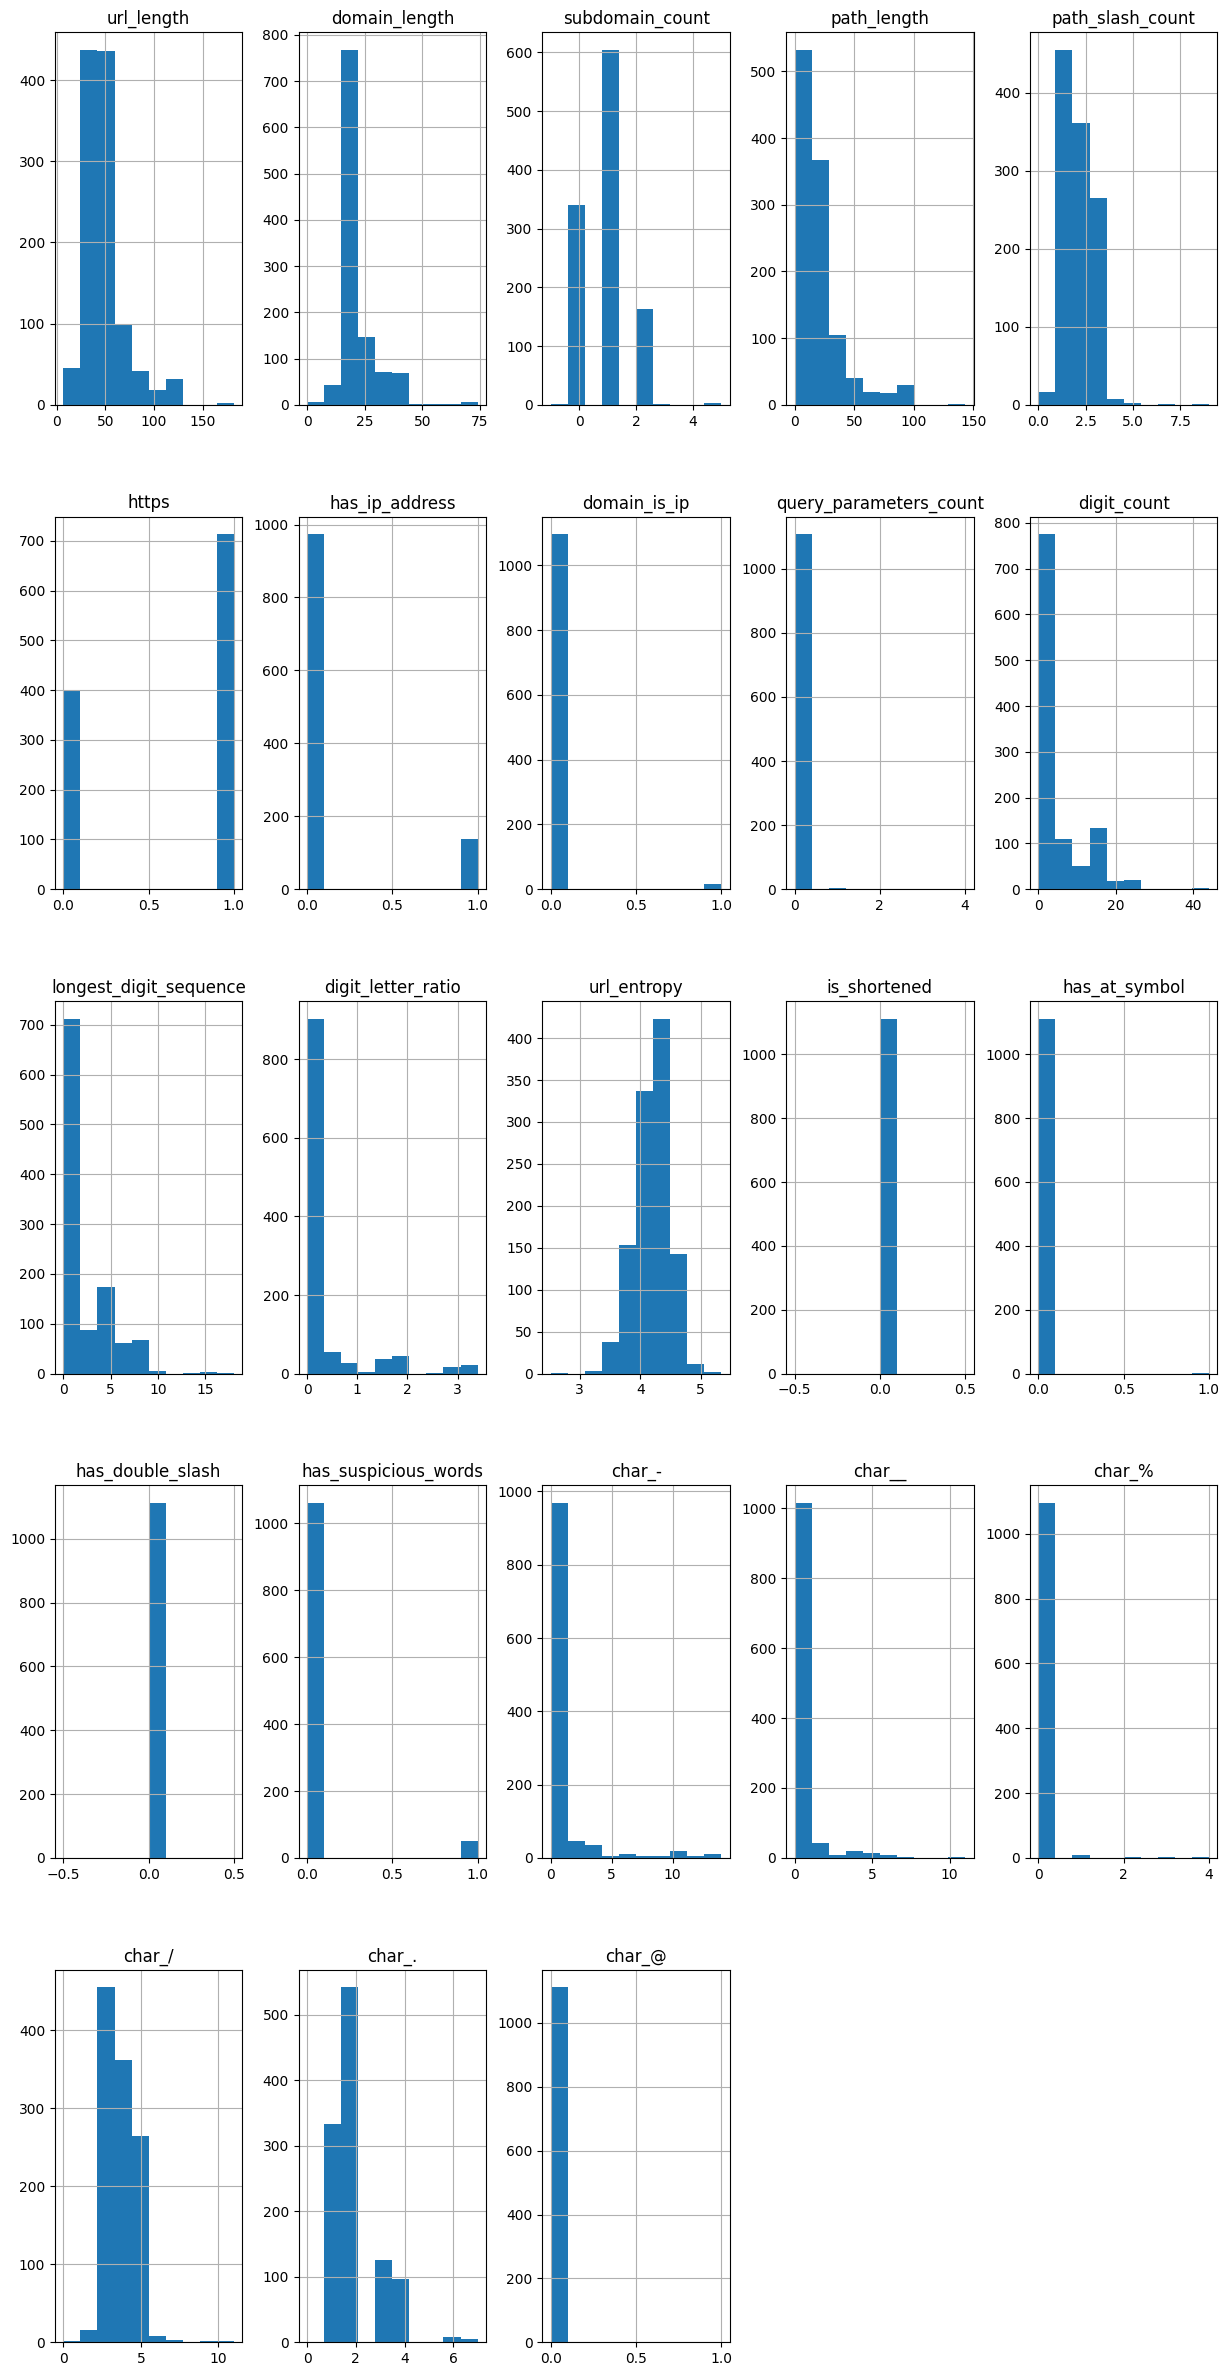

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Drop the 'ClassLabel' column
data = data.drop('ClassLabel', axis=1)

data.hist(figsize=(15, 30))  # Adjust figsize as needed
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Drop the 'ClassLabel' column
data = data.drop('ClassLabel', axis=1)

# Select numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix as a styled table
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm')

correlation_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,url_length,domain_length,subdomain_count,path_length,path_slash_count,https,has_ip_address,domain_is_ip,query_parameters_count,digit_count,longest_digit_sequence,digit_letter_ratio,url_entropy,is_shortened,has_at_symbol,has_double_slash,has_suspicious_words,char_-,char__,char_%,char_/,char_.,char_@
url_length,1.000000,0.098172,-0.332287,0.895972,0.542464,0.364078,-0.273295,-0.052388,0.207821,0.202556,0.397347,-0.234683,0.752410,nan,0.192893,nan,-0.046168,0.712791,0.267223,0.130855,0.542974,-0.214837,0.192893
domain_length,0.098172,1.000000,0.299365,-0.310887,-0.323951,-0.352217,-0.098552,-0.102734,0.031804,0.316475,0.204884,0.028745,0.247870,nan,0.013875,nan,0.174039,0.035930,-0.190782,-0.050331,-0.317080,0.264214,0.013875
subdomain_count,-0.332287,0.299365,1.000000,-0.435987,-0.520262,-0.500831,0.626050,0.206384,0.011497,0.431097,0.203588,0.587278,-0.278293,nan,-0.036852,nan,0.047402,-0.283527,0.047908,-0.012057,-0.511645,0.871369,-0.036852
path_length,0.895972,-0.310887,-0.435987,1.000000,0.650515,0.476461,-0.217725,-0.004658,0.003932,0.044059,0.287073,-0.231789,0.607540,nan,-0.007381,nan,-0.140302,0.683950,0.323178,0.148852,0.647566,-0.344801,-0.007381
path_slash_count,0.542464,-0.323951,-0.520262,0.650515,1.000000,0.549002,-0.312001,-0.017546,0.040133,-0.276284,-0.099557,-0.351067,0.473057,nan,0.005641,nan,-0.115510,0.263920,0.063275,0.024194,0.997788,-0.432448,0.005641
https,0.364078,-0.352217,-0.500831,0.476461,0.549002,1.000000,-0.505253,-0.166562,0.012187,-0.516335,-0.361895,-0.530153,0.340739,nan,0.022443,nan,-0.091836,0.124686,0.280350,0.073506,0.548212,-0.526539,0.022443
has_ip_address,-0.273295,-0.098552,0.626050,-0.217725,-0.312001,-0.505253,1.000000,0.329660,0.020305,0.626774,0.382946,0.896111,-0.396624,nan,-0.011340,nan,-0.083714,-0.143447,-0.139488,-0.040808,-0.309279,0.688157,-0.011340
domain_is_ip,-0.052388,-0.102734,0.206384,-0.004658,-0.017546,-0.166562,0.329660,1.000000,-0.006694,0.171825,0.058371,0.113840,-0.050524,nan,-0.003738,nan,-0.027597,-0.047289,-0.029133,-0.013453,-0.017187,0.356173,-0.003738
query_parameters_count,0.207821,0.031804,0.011497,0.003932,0.040133,0.012187,0.020305,-0.006694,1.000000,0.187274,0.140407,0.004136,0.119945,nan,0.894508,nan,0.115325,0.008708,0.049523,-0.005800,0.039987,0.227351,0.894508
digit_count,0.202556,0.316475,0.431097,0.044059,-0.276284,-0.516335,0.626774,0.171825,0.187274,1.000000,0.799059,0.721053,0.129449,nan,0.180455,nan,-0.064514,0.178491,-0.139303,0.039457,-0.273287,0.600428,0.180455


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from IPython.display import display

# Load dataset
data = pd.read_csv("resampled_dataset.csv")

X = data.drop(['ClassLabel',"URL"], axis=1)  # Drop 'ClassLabel' for features
y = data['ClassLabel']

# Mutual Information (directly on numerical features)
mutual_info = mutual_info_classif(X, y)

# Create DataFrame with feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mutual_info})

# Display mutual information scores in a table
display(feature_scores)

,Feature,Mutual_Information
0,url_length,0.332644
1,domain_length,0.558813
2,subdomain_count,0.186459
3,path_length,0.485200
4,path_slash_count,0.488593
5,https,0.359949
6,has_ip_address,0.110795
7,domain_is_ip,0.018272
8,query_parameters_count,0.015286
9,digit_count,0.169670


# Baseline Model Development

**Training Models with basic parameters**

In [54]:
from pickle import TRUE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display

# Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Feature Selection
features = ["url_length", "domain_length", "subdomain_count", "path_length", "path_slash_count", "https", "has_ip_address", "domain_is_ip",
            "is_shortened", "has_at_symbol", "has_double_slash", "has_suspicious_words", "char_-", "char__",
            "char_%", "char_/", "char_.", "char_@"]
X = data[features]
y = data["ClassLabel"]  # Target variable

# Handle missing values (fill with median)
X.fillna(X.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation
kfold_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    kfold_results[model_name] = {
        "Model": model_name,
        "Mean Accuracy": np.mean(scores),
        "Standard Deviation": np.std(scores)
    }

# Store results in a list of dictionaries
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
# Display the DataFrame

   # Extract precision, recall, and F1-score for each class
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
    })

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results)
kfold_results_df = pd.DataFrame(kfold_results.values())

# Reorder columns
kfold_results_df = kfold_results_df[['Model', 'Mean Accuracy', 'Standard Deviation']]

# Display the DataFrame
display(results_df)
display(kfold_results_df)

<ipython-input-54-c9202e7589e7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Logistic Regression,0.964126,0.966600,0.964126,0.964120,0.982045,"[[107, 8], [0, 108]]"
1,Decision Tree,0.995516,0.995554,0.995516,0.995515,0.995370,"[[115, 0], [1, 107]]"
2,Random Forest,0.991031,0.991031,0.991031,0.991031,0.999919,"[[114, 1], [1, 107]]"
3,SVM,0.977578,0.978571,0.977578,0.977583,0.991304,"[[110, 5], [0, 108]]"
4,MLP,0.986547,0.986911,0.986547,0.986550,0.994444,"[[112, 3], [0, 108]]"


,Model,Mean Accuracy,Standard Deviation
0,Logistic Regression,0.979336,0.010826
1,Decision Tree,0.993718,0.006710
2,Random Forest,0.996409,0.003357
3,SVM,0.982026,0.007497
4,MLP,0.990122,0.007711


# Hyperparameter Tuning

**Hyperparamter Tuning using grid search**

In [55]:
from pickle import TRUE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display

# Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Feature Selection
features = ["url_length", "domain_length", "subdomain_count", "path_length", "path_slash_count", "https", "has_ip_address", "domain_is_ip",
            "is_shortened", "has_at_symbol", "has_double_slash", "has_suspicious_words", "char_-", "char__",
            "char_%", "char_/", "char_.", "char_@"]
X = data[features]
y = data['ClassLabel']  # Target variable

# Handle missing values (fill with median)
X.fillna(X.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models and parameter grids for tuning
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Define models and parameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "MLP": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}


# Perform hyperparameter tuning and evaluate models
cv_results = {}
for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    model = models[model_name]  # Get model instance from dictionary
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_scaled, y)

    # Store results
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    cv_results[model_name] = {
        "Best Parameters": best_params,
        "Best Accuracy": best_score
    }

# Print and log results
log_data = []
for model, result in cv_results.items():
    print(f"{model}: Best Accuracy = {result['Best Accuracy']:.4f}, Best Parameters = {result['Best Parameters']}")
    log_data.append([model, result['Best Accuracy'], result['Best Parameters']])

# Save tuning results to CSV
df_log = pd.DataFrame(log_data, columns=['Model', 'Best Accuracy', 'Best Parameters'])
df_log.to_csv("Model_Tuning_Results.csv", index=False)

print("Hyperparameter tuning complete! Results saved in Model_Tuning_Results.csv")


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-55-5cbb23df375a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Tuning Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning MLP...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Logistic Regression: Best Accuracy = 0.9847, Best Parameters = {'C': 100, 'solver': 'lbfgs'}
Decision Tree: Best Accuracy = 0.9973, Best Parameters = {'max_depth': 10, 'min_samples_split': 5}
Random Forest: Best Accuracy = 0.9964, Best Parameters = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
SVM: Best Accuracy = 0.9874, Best Parameters = {'C': 10, 'kernel': 'rbf'}
MLP: Best Accuracy = 0.9946, Best Parameters = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Hyperparameter tuning complete! Results saved in Model_Tuning_Results.csv


**Model Optimisation, Validation Curves, Over/Under fitting**

<ipython-input-56-ecb01bea20b9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/l

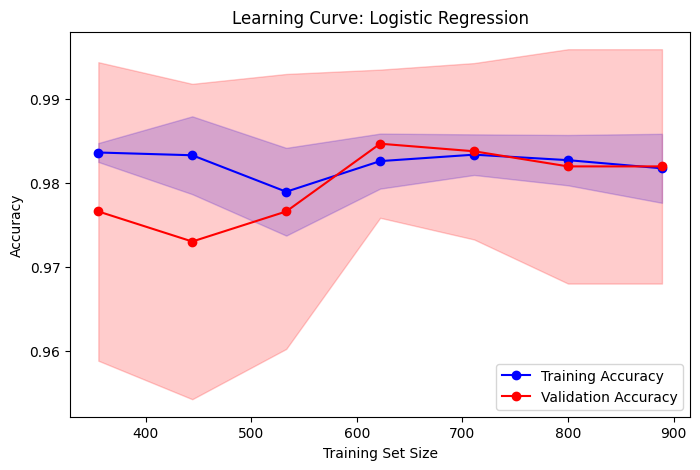

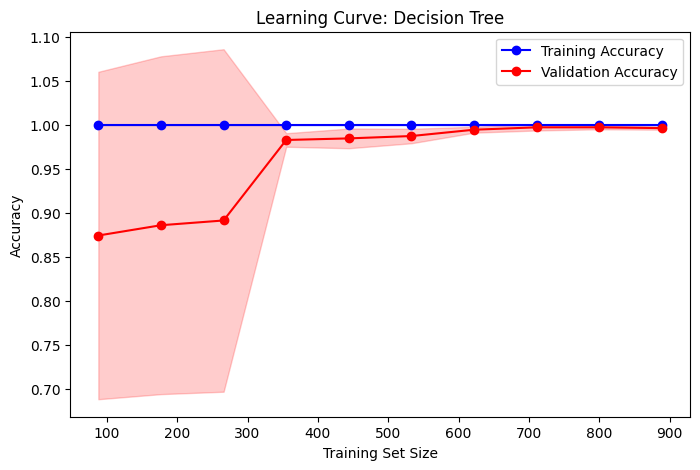

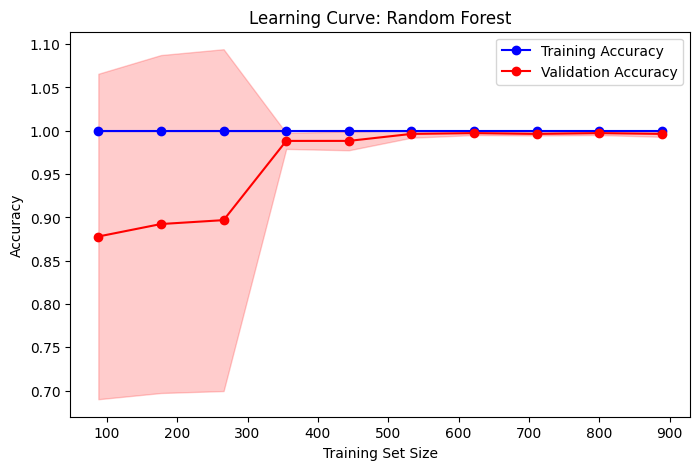

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        

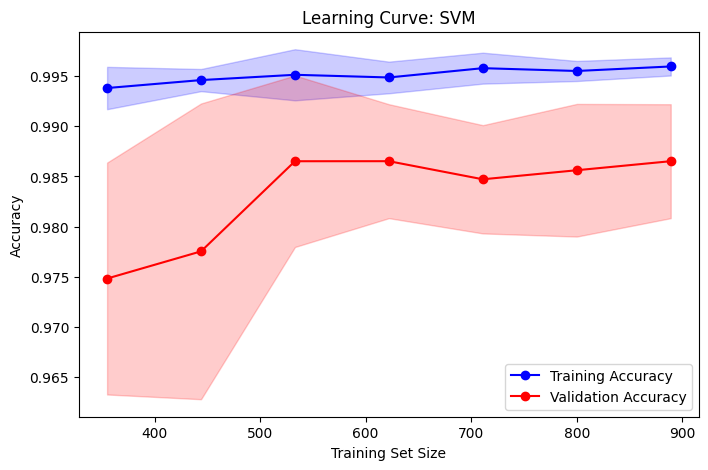

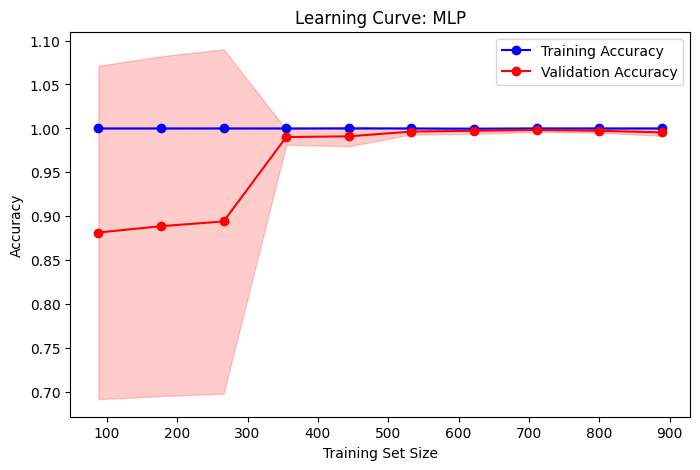

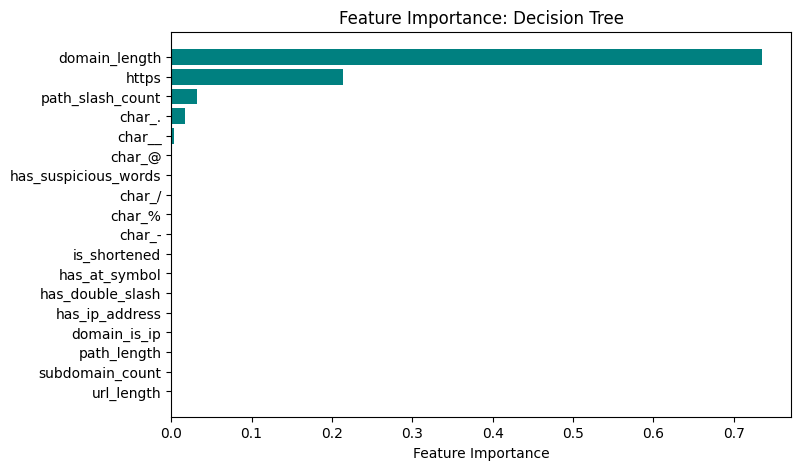

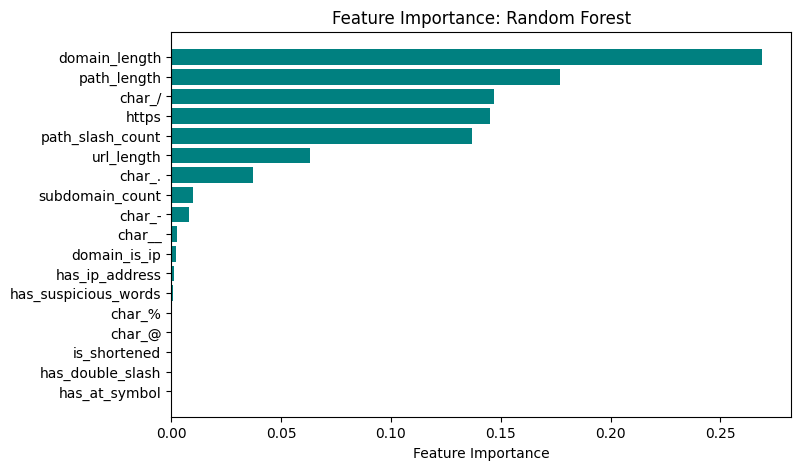

Analysis complete! Check the plots for insights.


In [56]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display

# Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Feature Selection
features = ["url_length", "domain_length", "subdomain_count", "path_length", "path_slash_count", "https", "has_ip_address", "domain_is_ip",
            "is_shortened", "has_at_symbol", "has_double_slash", "has_suspicious_words", "char_-", "char__",
            "char_%", "char_/", "char_.", "char_@"]
X = data[features]
y = data['ClassLabel']  # Target variable

# Handle missing values (fill with median)
X.fillna(X.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models and parameter grids for tuning
models = {
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50),
    "SVM": SVC(C=10, kernel='rbf', probability=True),
    "MLP": MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100, 50), solver='adam', max_iter=500)
}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve: {model_name}")
    plt.legend()
    plt.show()

# Plot learning curves for all models
for model_name, model in models.items():
    plot_learning_curve(model, X_scaled, y, model_name)

# Feature Importance (for Decision Tree & Random Forest)
def plot_feature_importance(model, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(8, 5))
    plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color='teal')
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance: {model_name}")
    plt.show()

# Train tree-based models and plot feature importance
tree_models = ["Decision Tree", "Random Forest"]
for model_name in tree_models:
    model = models[model_name].fit(X_scaled, y)
    plot_feature_importance(model, model_name)

print("Analysis complete! Check the plots for insights.")



**Validation for performance esitmates**

In [57]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display
from sklearn.pipeline import Pipeline

# Load Dataset
data = pd.read_csv("resampled_dataset.csv")

# Feature Selection
features = ["url_length", "domain_length", "subdomain_count", "path_length", "path_slash_count", "https", "has_ip_address", "domain_is_ip",
            "is_shortened", "has_at_symbol", "has_double_slash", "has_suspicious_words", "char_-", "char__",
            "char_%", "char_/", "char_.", "char_@"]
X = data[features]
y = data['ClassLabel']  # Target variable

# Handle missing values (fill with median)
X.fillna(X.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define models and parameter grids for tuning
models = {
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50),
    "SVM": SVC(C=10, kernel='rbf', probability=True),
    "MLP": MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100, 50), solver='adam', max_iter=500)
}


# Define models with pipelines
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(C=0.1, solver='lbfgs'))  # Updated
    ]),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_split=10),  # Updated
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10),  # Updated
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(C=10, kernel='rbf', probability=True))  # Updated
    ]),
    "MLP": Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', alpha=0.001, max_iter=500))  # Updated
    ])
}

# Nested Cross-Validation Setup
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform Nested CV Evaluation
cv_results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name} using Nested Cross-Validation...")
    scores = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='accuracy', n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)

    # Store results
    cv_results[model_name] = {
        "Mean Accuracy": mean_score,
        "Std Deviation": std_score
    }

# Print results
for model, result in cv_results.items():
    print(f"{model}: Mean Accuracy = {result['Mean Accuracy']:.4f}, Std Dev = {result['Std Deviation']:.4f}")

# Evaluate final models on the validation set
val_results = {}
for model_name, model in models.items():
       model.fit(X_train, y_train)
       val_accuracy = model.score(X_val, y_val)  # Use X_val and y_val here
       val_results[model_name] = val_accuracy


# Print validation results
print("\nFinal Validation Set Performance:")
for model, acc in val_results.items():
    print(f"{model}: Validation Accuracy = {acc:.4f}")

print("Nested Cross-Validation and Validation Set Evaluation Complete!")




<ipython-input-57-c77110389b8e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Evaluating Logistic Regression using Nested Cross-Validation...
Evaluating Decision Tree using Nested Cross-Validation...
Evaluating Random Forest using Nested Cross-Validation...
Evaluating SVM using Nested Cross-Validation...
Evaluating MLP using Nested Cross-Validation...
Logistic Regression: Mean Accuracy = 0.9733, Std Dev = 0.0196
Decision Tree: Mean Accuracy = 0.9958, Std Dev = 0.0034
Random Forest: Mean Accuracy = 0.9986, Std Dev = 0.0028
SVM: Mean Accuracy = 0.9845, Std Dev = 0.0113
MLP: Mean Accuracy = 0.9887, Std Dev = 0.0056

Final Validation Set Performance:
Logistic Regression: Validation Accuracy = 0.9944
Decision Tree: Validation Accuracy = 0.9944
Random Forest: Validation Accuracy = 0.9944
SVM: Validation Accuracy = 0.9888
MLP: Validation Accuracy = 0.9944
Nested Cross-Validation and Validation Set Evaluation Complete!
